In [2]:
using Phylo, Plots, FASTX, MolecularEvolution, CodonMolecularEvolution, JLD2, MCMCChains, StatsPlots, MCMCDiagnosticTools, Measures, BenchmarkTools

In [3]:
analysis_name = "output/Ace2"
seqnames,seqs = read_fasta("../test/data/Ace2_tiny/Ace2_tiny_tagged.fasta");
treestring = readlines(open("../test/data/Ace2_tiny/tiny_tagged_no_bg.tre"))[1]
tags = ["{G1}", "{G2}"]
#treestring, tags, tag_colors = import_colored_figtree_nexus_as_tagged_tree("../test/data/Ace2_tiny/Ace2_tiny_tagged_no_bg_tags_flipped.nex")
df,results = difFUBAR(seqnames, seqs, treestring, tags, analysis_name);
print(typeof(results))
diffubar_alloc_grid = results[1]
diffubar_codon_param_vec = results[2]

Step 1: Initialization. If exports = true, tree showing the assignment of branches to groups/colors will be exported to: output/Ace2_tagged_input_tree.svg.
Step 2: Optimizing global codon model parameters.
Optimized single α,β LL=-17461.80292552851 with α=1.688175953772318 and β=0.830522823141943.
Step 3: Calculating grid of 1728-by-808 conditional likelihood values (the slowest step). Currently on:
0.0% 29.0% 58.0% 87.0% 
Step 4: Running Gibbs sampler to infer site categories.
Step 5: Tabulating and plotting. Detected sites:
Site 3 - P(ω1 > ω2):0.012; P(ω2 > ω1):0.9565; P(ω1 > 1):0.1735; P(ω2 > 1):0.931
Site 29 - P(ω1 > ω2):0.973; P(ω2 > ω1):0.001; P(ω1 > 1):0.973; P(ω2 > 1):0.1705
Site 36 - P(ω1 > ω2):0.9665; P(ω2 > ω1):0.003; P(ω1 > 1):0.905; P(ω2 > 1):0.2475
Site 45 - P(ω1 > ω2):0.009; P(ω2 > ω1):0.9525; P(ω1 > 1):0.1235; P(ω2 > 1):0.864
Site 68 - P(ω1 > ω2):0.9695; P(ω2 > ω1):0.0035; P(ω1 > 1):0.3375; P(ω2 > 1):0.0215
Site 69 - P(ω1 > ω2):0.37; P(ω2 > ω1):0.234; P(ω1 > 1):0.961; P

1728-element Vector{Vector{Float64}}:
 [0.009999999999999995, 0.009999999999999995, 0.009999999999999995]
 [0.009999999999999995, 0.009999999999999995, 0.046677243358155304]
 [0.009999999999999995, 0.009999999999999995, 0.10577482305553314]
 [0.009999999999999995, 0.009999999999999995, 0.20099800796022266]
 [0.009999999999999995, 0.009999999999999995, 0.3544299249663776]
 [0.009999999999999995, 0.009999999999999995, 0.6016528379549163]
 [0.009999999999999995, 0.009999999999999995, 1.0]
 [0.009999999999999995, 0.009999999999999995, 1.6418517587677186]
 [0.009999999999999995, 0.009999999999999995, 2.67605940347183]
 [0.009999999999999995, 0.009999999999999995, 4.342465139303896]
 ⋮
 [11.353924664211041, 11.353924664211041, 0.20099800796022266]
 [11.353924664211041, 11.353924664211041, 0.3544299249663776]
 [11.353924664211041, 11.353924664211041, 0.6016528379549163]
 [11.353924664211041, 11.353924664211041, 1.0]
 [11.353924664211041, 11.353924664211041, 1.6418517587677186]
 [11.3539246642

In [4]:
include("../src/difFUBAR/skbDifFUBAR.jl")

hypothesis_posterior_probabilities (generic function with 1 method)

In [17]:
@load "../output/output_long_nuts_sim/alloc_grid.jld2" alloc_grid
@load "../output/output_long_nuts_sim/ambient_samples.jld2" ambient_samples
@load "../output/output_long_nuts_sim/model.jld2" model_dict 
println(size(ambient_samples))
println(size(ambient_samples[1]))

(8,)
(400,)


In [20]:
square_distance_matrix = generate_square_l2_distance_matrix(model_dict[:codon_param_index_vec])
kernel_stddev = 1.0 # example values idk what these should be xD
kernel_stddev_mat = 2.0#[1.0 0.0; 0.0 10.0]
suppression_stddev = 1.0
model = SKBDIModel(
    model_dict[:parameter_grids],
    model_dict[:parameter_names],
    model_dict[:hypothesis_masks],
    s -> CodonMolecularEvolution.quintic_smooth_transition(-1, 1, s),
    model_dict[:log_con_lik_matrix],
    model_dict[:con_lik_matrix],
    model_dict[:codon_param_vec],
    model_dict[:codon_param_index_vec],
    s -> toves_ambient_to_parameter_transform(
                s,
                model_dict[:kernel_dim],
                model_dict[:suppression_dim],
                kernel_stddev_mat,
                suppression_stddev,
                square_distance_matrix,
                toves_weight_function),
    1)

SKBDIModel([[0.009999999999999995, 0.046677243358155304, 0.10577482305553314, 0.20099800796022266, 0.3544299249663776, 0.6016528379549163, 1.0, 1.6418517587677186, 2.67605940347183, 4.342465139303896, 7.027523686911609, 11.353924664211041], [0.009999999999999995, 0.046677243358155304, 0.10577482305553314, 0.20099800796022266, 0.3544299249663776, 0.6016528379549163, 1.0, 1.6418517587677186, 2.67605940347183, 4.342465139303896, 7.027523686911609, 11.353924664211041], [0.05, 0.13001028718392543, 0.274037034920393, 0.533299997142476, 1.0, 1.8401080154312168, 3.3523888666641257]], ["alpha", "omega_1", "omega_2", "background_omega"], Bool[0 0 … 1 1; 0 0 … 1 1; 0 0 … 1 0; 0 1 … 0 0], var"#74#76"(), [-3.839148149233197 -30.344841971494223 … -47.94618820418001 -23.334255449792952; -3.839903648760521 -30.345284496506352 … -47.94670336703331 -23.334784343782978; … ; -91.26655799030225 -95.33044430147183 … -99.89358205430005 -87.84306700056084; -97.66354877162979 -101.84133794671169 … -107.1174977

In [21]:
#= ambient_sample_mat = reduce(hcat, ambient_samples)
ambient_sample_mat = permutedims(ambient_sample_mat, (2, 1))        # 3D: iterations × parameters × chains
ambient_sample_mat = reshape(ambient_sample_mat, size(ambient_sample_mat)..., 1) =#
n_chains = length(ambient_samples)
n_iters = length(ambient_samples[1])
n_params = length(ambient_samples[1][1])
ambient_sample_mat = Array{Float64}(undef, n_iters, n_params, n_chains)
for c in 1:n_chains
    for i in 1:n_iters
        ambient_sample_mat[i, :, c] = ambient_samples[c][i]
    end
end

In [28]:
LL_lists = zeros(Float64, n_chains, n_iters)
for i = 1:n_chains
    LL_lists[i, :] = [log_likelihood(model, s) for s in ambient_samples[i][1:min(100, n_iters)]]
end

In [ ]:
println(size(LL_lists))
print(LL_)

(8, 400)


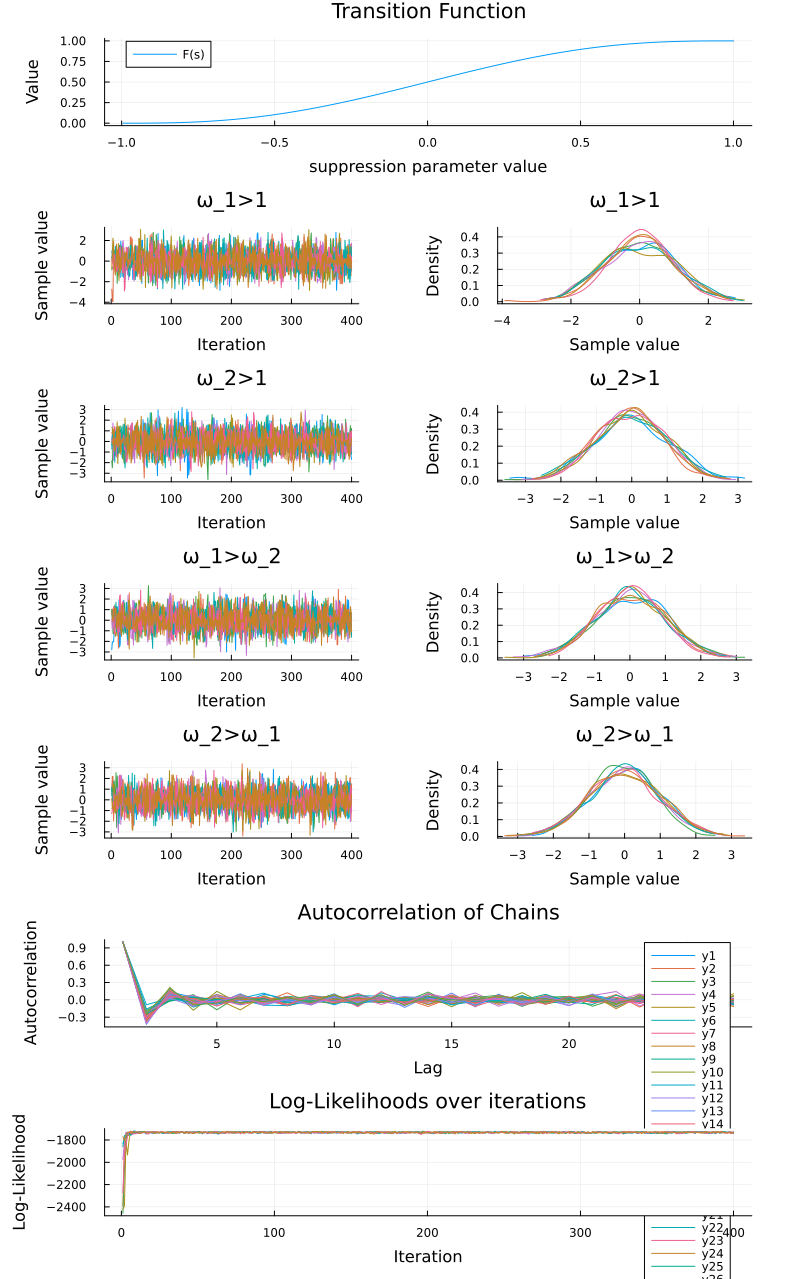

In [ ]:
F = s -> CodonMolecularEvolution.quintic_smooth_transition(s, -1, 1)
s_values = -1 .+ 2/ 500 .* (1:500) 
F_values = F.(s_values)
hypothesis_names = ["ω_1>1", "ω_2>1", "ω_1>ω_2", "ω_2>ω_1"]
F = s -> CodonMolecularEvolution.quintic_smooth_transition(s, -1, 1)
p1 = plot(s_values, F_values, label="F(s)", title="Transition Function", xlabel="suppression parameter value", ylabel="Value")
chn = Chains(ambient_sample_mat[:, model_dict[:kernel_dim] + 1:model_dict[:kernel_dim] + model_dict[:suppression_dim], :], hypothesis_names)
p2 = plot(chn)
p3 = plot(autocor(chn[hypothesis_names[1]]), title="Autocorrelation of Chains", xlabel="Lag", ylabel="Autocorrelation")
for i in 2:length(hypothesis_names)
    plot!(autocor(chn[hypothesis_names[i]]))
end
p4 = plot(1:length(LL_lists[1, :]), LL_lists[1, :],legend=false, title="Log-Likelihoods over iterations", xlabel="Iteration", ylabel="Log-Likelihood")
for i = 2:n_chains
plot!(1:length(LL_lists[i, :]), LL_lists[i, :])
end
plot(p1, p2, p3, p4, legend=false,layout = @layout([a{0.1h}; b; c{0.1h}; d{0.1h}]), size =(800, 1.6 * 800), left_margin = 10mm,  right_margin = 10mm)
#savefig("mcmc_diagnostics_nuts.pdf")

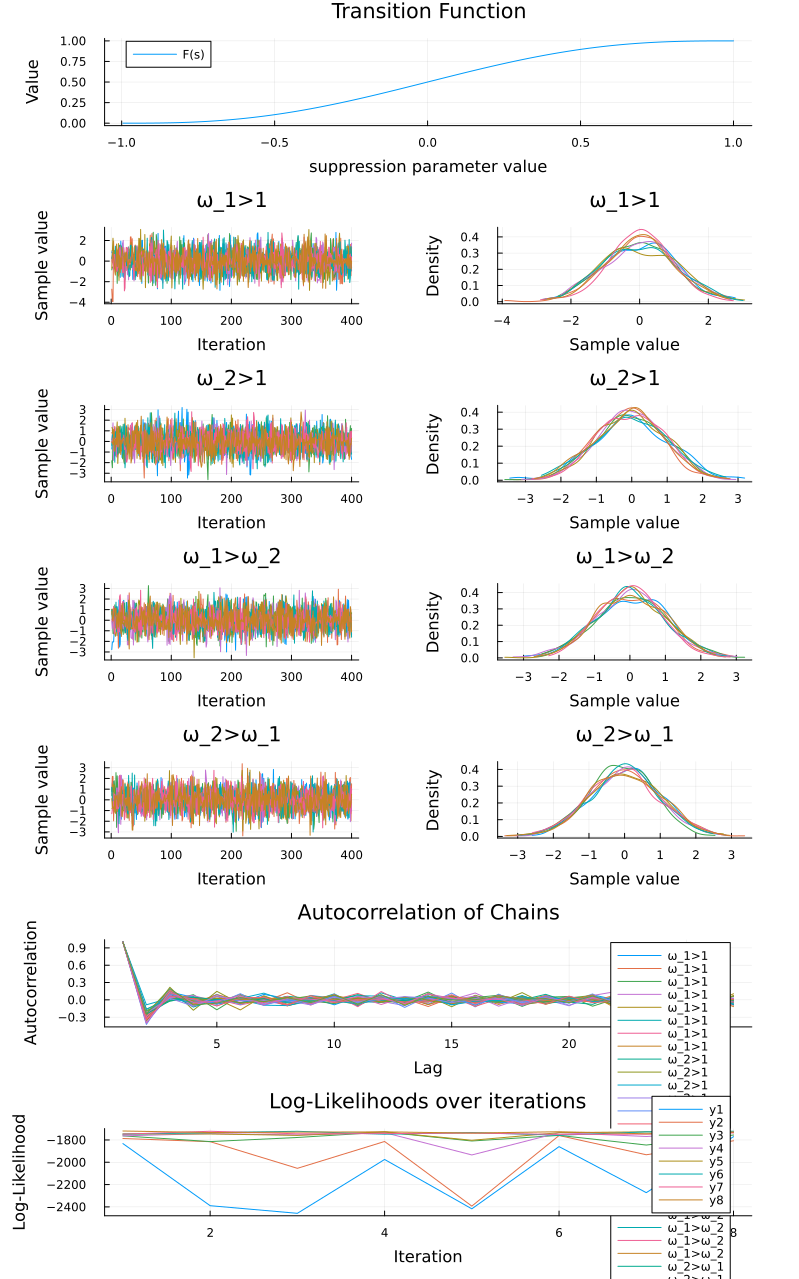

In [35]:
F = s -> CodonMolecularEvolution.quintic_smooth_transition(s, -1, 1)
s_values = -1 .+ 2/ 500 .* (1:500) 
F_values = F.(s_values)
hypothesis_names = ["ω_1>1", "ω_2>1", "ω_1>ω_2", "ω_2>ω_1"]
F = s -> CodonMolecularEvolution.quintic_smooth_transition(s, -1, 1)
p1 = plot(s_values, F_values, label="F(s)", title="Transition Function", xlabel="suppression parameter value", ylabel="Value")
chn = Chains(ambient_sample_mat[:, model_dict[:kernel_dim] + 1:model_dict[:kernel_dim] + model_dict[:suppression_dim], :], hypothesis_names)
p2 = plot(chn)
p3 = plot(autocor(chn[hypothesis_names[1]]), label=hypothesis_names[1], title="Autocorrelation of Chains", xlabel="Lag", ylabel="Autocorrelation")
for i in 2:length(hypothesis_names)
    plot!(autocor(chn[hypothesis_names[i]]), label=hypothesis_names[i])
end
p4 = plot(1:length(LLs[1, :]), LLs[1, :], title="Log-Likelihoods over iterations", xlabel="Iteration", ylabel="Log-Likelihood")
for i = 2:n_chains
plot!(1:length(LLs[i, :]), LLs[i, :])
end
plot(p1, p2, p3, p4, layout = @layout([a{0.1h}; b; c{0.1h}; d{0.1h}]), size =(800, 1.6 * 800), left_margin = 10mm,  right_margin = 10mm)
#savefig("mcmc_diagnostics_nuts.pdf")

In [ ]:
p1 = plot(1:400, LLs[1, :])
#plot(p1)
savefig("shifd.pdf")

BoundsError: BoundsError: attempt to access 8-element Vector{Float64} at index [1:400]

In [9]:
for i = 1:model_dict[:suppression_dim]
    println("P(F(s) > 0) for hypothesis ", hypothesis_names[i], ") = ", mean([F(a[model_dict[:kernel_dim] + i]) > 0 for a in ambient_samples[1000:end]]))
end

MethodError: MethodError: no method matching zero(::Type{Any})
This error has been manually thrown, explicitly, so the method may exist but be intentionally marked as unimplemented.

Closest candidates are:
  zero(::Type{Union{Missing, T}}) where T
   @ Base missing.jl:105
  zero(!Matched::Type{Union{}}, Any...)
   @ Base number.jl:310
  zero(!Matched::Type{LibGit2.GitHash})
   @ LibGit2 C:\Users\toven\AppData\Local\Programs\Julia-1.11.5\share\julia\stdlib\v1.11\LibGit2\src\oid.jl:221
  ...


In [10]:
f = (i, j) -> mean([F(ambient_samples[k][model_dict[:kernel_dim] + i]) > 0 for k in 1:j])
p1 = plot(1:10000, f.(1, 1:100), label=hypothesis_names[1], title="P(F(s) > 0) for each hypothesis")
for i in 2:model_dict[:suppression_dim]
    plot!(1:10000, f.(i, 1:100), label=hypothesis_names[i])
end
display(p1)

MethodError: MethodError: no method matching isless(::Vector{Float64}, ::Int64)
The function `isless` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  isless(!Matched::NLopt.Result, ::Integer)
   @ NLopt C:\Users\toven\.julia\packages\NLopt\ZvUrS\src\NLopt.jl:151
  isless(!Matched::DataValues.DataValue{Union{}}, ::Any)
   @ DataValues C:\Users\toven\.julia\packages\DataValues\N7oeL\src\scalar\core.jl:293
  isless(::Any, !Matched::DataValues.DataValue{Union{}})
   @ DataValues C:\Users\toven\.julia\packages\DataValues\N7oeL\src\scalar\core.jl:291
  ...


In [11]:
autocorplot(chn)

ErrorException: lags must be less than the sample length.

In [23]:
skbi_posterior_probabilities = hypothesis_posterior_probabilities(alloc_grid, model.codon_param_vec)
diffubar_posterior_probabilities = hypothesis_posterior_probabilities(diffubar_alloc_grid, diffubar_codon_param_vec)

808×4 Matrix{Float64}:
 0.088   0.086   0.32    0.345
 0.676   0.256   0.7965  0.0845
 0.1735  0.931   0.012   0.9565
 0.0515  0.023   0.6335  0.1555
 0.767   0.7865  0.1995  0.3615
 0.092   0.11    0.311   0.376
 0.2155  0.269   0.4025  0.4755
 0.6475  0.5275  0.4955  0.1995
 0.083   0.393   0.119   0.758
 0.1385  0.573   0.0945  0.8175
 ⋮                       
 0.2325  0.0685  0.797   0.072
 0.631   0.2195  0.784   0.0325
 0.2015  0.3925  0.1605  0.567
 0.1485  0.206   0.319   0.389
 0.0205  0.1855  0.1035  0.7755
 0.025   0.039   0.3085  0.3285
 0.0045  0.0135  0.264   0.3065
 0.001   0.001   0.249   0.244
 0.1155  0.0525  0.657   0.156

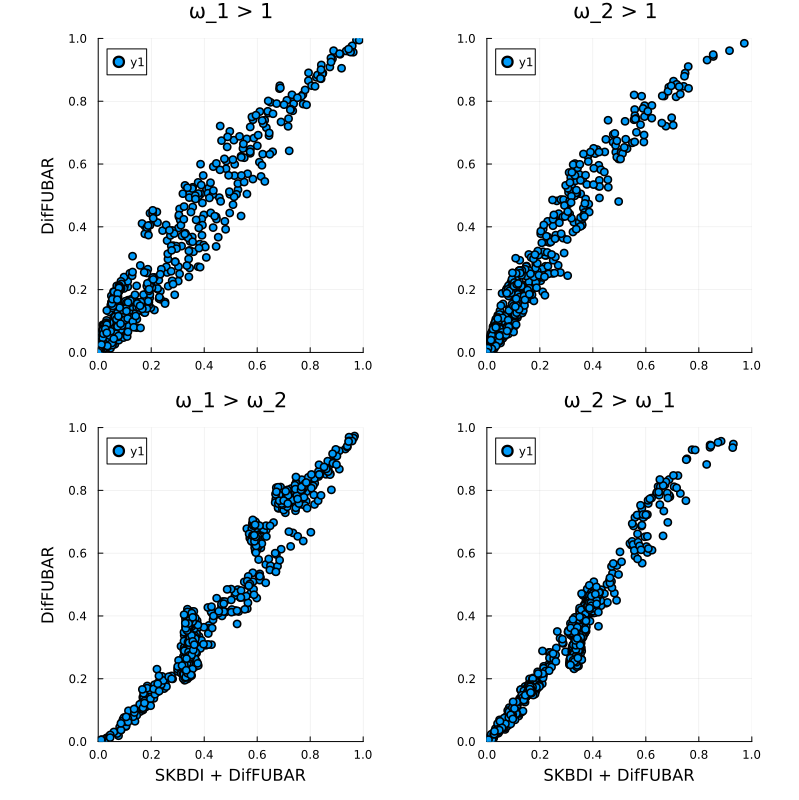

In [24]:
p1 = scatter(skbi_posterior_probabilities[:, 1], diffubar_posterior_probabilities[:, 1], title="ω_1 > 1", ylabel="DifFUBAR",limits=(0, 1))
p2 = scatter(skbi_posterior_probabilities[:, 2], diffubar_posterior_probabilities[:, 2], title="ω_2 > 1 ", limits=(0, 1))
p3 = scatter(skbi_posterior_probabilities[:, 3], diffubar_posterior_probabilities[:, 3], xlabel="SKBDI + DifFUBAR", title="ω_1 > ω_2", ylabel="DifFUBAR", limits=(0, 1))
p4 = scatter(skbi_posterior_probabilities[:, 4], diffubar_posterior_probabilities[:, 4], xlabel="SKBDI + DifFUBAR", title="ω_2 > ω_1", limits=(0, 1))
plot(p1, p2, p3, p4, layout = @layout([a b; c d]), size =(800, 800), left_margin = 10mm,  right_margin = 10mm)
#savefig("difFUBAR_vs_SKBDI_posterior_probabilities.pdf")

In [14]:
ambient_samples[1:2]

2-element Vector{Any}:
 [[-0.5770590618322211, -1.449039958694004, 2.2267511862439626, 0.4320927011085104, 0.6545270578334215, -0.17951915448413053, 0.4516134502593929, 0.5293936470124155, 0.05547424805194035, 1.1959724585397518  …  1.5353209889683581, -0.8231132360476051, 0.2870492204464307, -0.07544582202380089, 0.10256157247983608, -1.6072782366897531, -0.16821838530636476, -1.1121417566096035, 1.8322778142314564, -1.515183384159153], [0.05539526288996899, -1.2775091748365566, 2.0859300313134184, 0.5342372705166227, 0.6211679456097973, -0.16292346327088753, 0.5052590850813461, 0.383290338934332, -0.05892670115588343, 1.1507567463867823  …  1.3872135667384453, -0.8035745437603324, 0.24633750466796103, -0.09283021763741348, 0.12053714368750845, -1.718103059731273, -0.1830166329011245, -1.2566940934806843, 1.781486639870075, -1.39767247541257], [-0.15575469747174447, -1.2919187173995976, 2.0856142020428585, 0.7576785248999921, 0.556151279340301, -0.7541455449331512, -0.0373999064779920

In [15]:
stop = 2
println("timing ambient_to_parameter_transform (basically just krylov)")
@btime model.ambient_to_parameter_transform.(ambient_samples[1000:1000 + stop])
f = s -> to_probability_vector(model, s)
println("timing to_probability_vector (ambient_to_parameter_transform + some other stuff)")
@btime a = f.(ambient_samples[1000:1000 + stop])
g = s -> log_likelihood(model, s)
println("timing log_likelihood (to_probability_vector + multiplication by con_lik_matrix)")
@btime b = g.(ambient_samples[1000:1000 + stop])
#print(count([count(a[i] .> 0.0) == 84 for i in 1:500])) 


timing ambient_to_parameter_transform (basically just krylov)


BoundsError: BoundsError: attempt to access 4-element Vector{Any} at index [1000:1002]

In [16]:
34 / 36

0.9444444444444444